In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import geopandas as gpd

In [ ]:
# Ebola 데이터 읽기
ebola = pd.read_csv('data/ebola_2014-2016.csv')

In [ ]:
# Ebola의 Date 컬럼을 datetime 타입으로 변경
ebola.Date = pd.to_datetime(ebola['Date'], format='%Y-%m-%d')

In [ ]:
# 데이터를 2014, 2015, 2016으로 나누기
mask_2014 = (ebola['Date'] >= '2014-01-01') & (ebola['Date'] <= '2014-12-31')
mask_2015 = (ebola['Date'] >= '2015-01-01') & (ebola['Date'] <= '2015-12-31')
mask_2016 = (ebola['Date'] >= '2016-01-01') & (ebola['Date'] <= '2016-12-31')

In [ ]:
ebola2014 = ebola.loc[mask_2014]
ebola2015 = ebola.loc[mask_2015]
ebola2016 = ebola.loc[mask_2016]

In [ ]:
# 2015, 2016년 데이터를 상 하반기로 나누기. ( 2014년 데이터는 하반기부터 시작됨. 2016년 데이터는 하반기가 없음. )
mask_2015_first = (ebola2015['Date'] >= '2015-01-01') & (ebola2015['Date'] <= '2015-06-30')
mask_2015_second = (ebola2015['Date'] >= '2015-07-01') & (ebola2015['Date'] <= '2015-12-31')

mask_2016 = (ebola2016['Date'] >= '2016-01-01') & (ebola2016['Date'] <= '2016-06-30')

In [ ]:
"""
데이터셋
    ebola2014
    ebola2015_first, ebola2015_second
    ebola2016_first, ebola2016_second
"""
ebola2015_first = ebola2015.loc[mask_2015_first]
ebola2015_second = ebola2015.loc[mask_2015_second]

ebola2016 = ebola2016.loc[mask_2016]

In [ ]:
ebola2014_cases = ebola2014.Cases.sum()
ebola2014_deaths = ebola2014.Deaths.sum()

ebola2015_first_cases = ebola2015_first.Cases.sum()
ebola2015_first_deaths = ebola2015_first.Deaths.sum()
ebola2015_second_cases = ebola2015_second.Cases.sum()
ebola2015_second_deaths = ebola2015_second.Deaths.sum()

ebola2016_cases = ebola2016.Cases.sum()
ebola2016_deaths = ebola2016.Deaths.sum()

In [ ]:
ebola_dataset = pd.DataFrame(
    data= {
        'Cases': [ebola2014_cases, ebola2015_first_cases, ebola2015_second_cases, ebola2016_cases],
        'Deaths': [ebola2014_deaths, ebola2015_first_deaths, ebola2015_second_deaths, ebola2016_deaths]
    },

    index= ['2014', '2015_first', '2015_second', '2016'],
    columns= ['Cases', 'Deaths']
)

In [ ]:
ebola_dataset

In [ ]:
matplotlib.style.use('fivethirtyeight')
ebola_dataset.plot(kind='bar')
plt.title('Ebola virus Cases & Death by year ( 2014 ~ 2016 ) ')
plt.xlabel('Year')
plt.ylabel('Figure')
plt.xticks(rotation=0, horizontalalignment='center')

In [ ]:
# 세계지도 정보 가져오기
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
# 데이터셋에서 각 나라의 Cases와 Deaths를 반환하는 함수
def retrn_groupData(dataset, country):
    return [dataset.loc[dataset['Country'] == country].Cases.sum(), dataset.loc[dataset['Country'] == country].Deaths.sum()]

In [137]:
"""
ebola2014 -> e2014
ebola2015 -> e2015
ebola2016 -> e2016
"""

e2014 = pd.DataFrame(
    data={
        'Country': ebola2014['Country'].unique(),
        'Cases': [retrn_groupData(ebola2014, x)[0] for x in ebola2014['Country'].unique()],
        'Deaths': [retrn_groupData(ebola2014, x)[1] for x in ebola2014['Country'].unique()]
    },
    columns=['Country', 'Cases', 'Deaths']
)

e2015 = pd.DataFrame(
    data={
        'Country': ebola2015['Country'].unique(),
        'Cases': [retrn_groupData(ebola2015, x)[0] for x in ebola2015['Country'].unique()],
        'Deaths': [retrn_groupData(ebola2015, x)[1] for x in ebola2015['Country'].unique()]
    },

    columns=['Country', 'Cases', 'Deaths']
)

e2016 = pd.DataFrame(
    data={
        'Country': ebola2016['Country'].unique(),
        'Cases': [retrn_groupData(ebola2016, x)[0] for x in ebola2016['Country'].unique()],
        'Deaths': [retrn_groupData(ebola2016, x)[1] for x in ebola2016['Country'].unique()]
    },

    columns=['Country', 'Cases', 'Deaths']
)


In [138]:
# Cases와 Deaths를 int, float으로 변환
def setInt(x):
    if x.name != 'Country':
        x = x.astype(int)

e2014.apply(setInt)
e2015.apply(setInt)
e2016.apply(setInt)

Country    None
Cases      None
Deaths     None
dtype: object

In [139]:
def set_lower_data(x):
    if x >= 1000:
        return x * 1/10

e2014['Cases'] = e2014['Cases'].apply(set_lower_data)

In [140]:
e2014

,Country,Cases,Deaths
0,Guinea,6619.0,40462.0
1,Nigeria,NaN,303.0
2,Sierra Leone,19229.1,51945.0
3,Liberia,21079.6,95625.0
4,Senegal,NaN,0.0
5,United States of America,NaN,25.0
6,Spain,NaN,0.0
7,Mali,NaN,101.0


In [ ]:
# Country와 Geometry column만 남기고 모두 drop.
countries = countries.drop(['pop_est', 'continent', 'iso_a3', 'gdp_md_est'], axis=1)

In [ ]:
countries['Cases'] = 0
countries['Deaths'] = 0

In [83]:
for i in range(countries.shape[0]):
    if countries.loc[i, 'name'] in list(e2014['Country']):
        country = countries['name'].loc[i]
        cases = e2014['Cases'].loc[e2014['Country'] == country].to_numpy()[0]
        deaths = e2014['Deaths'].loc[e2014['Country'] == country].to_numpy()[0]

        countries.loc[i, 'Cases'] = cases
        countries.loc[i, 'Deaths'] = deaths

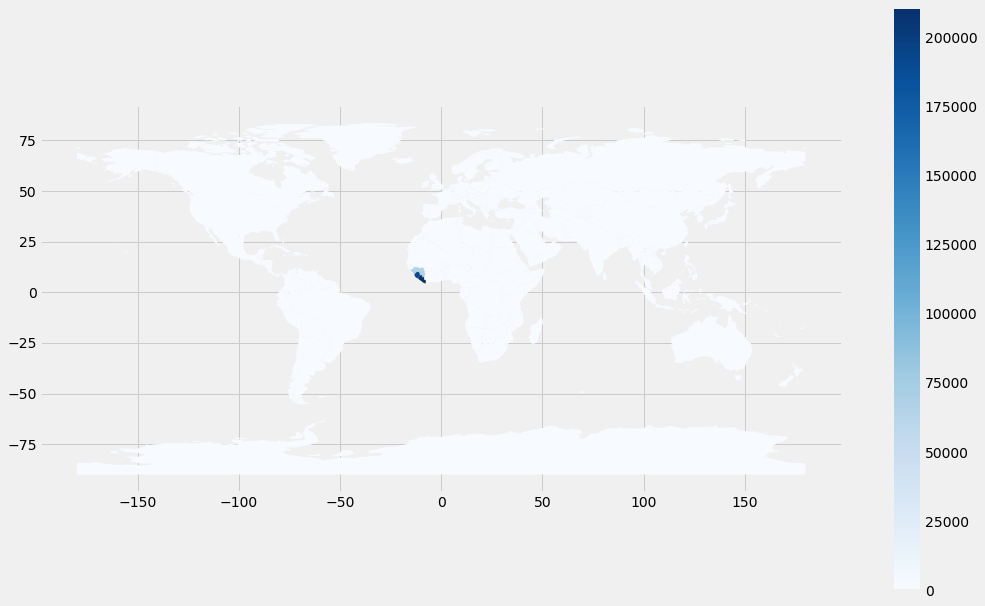

In [88]:
countries.plot(column='Cases', figsize=(16, 10), cmap='Blues', legend=True)

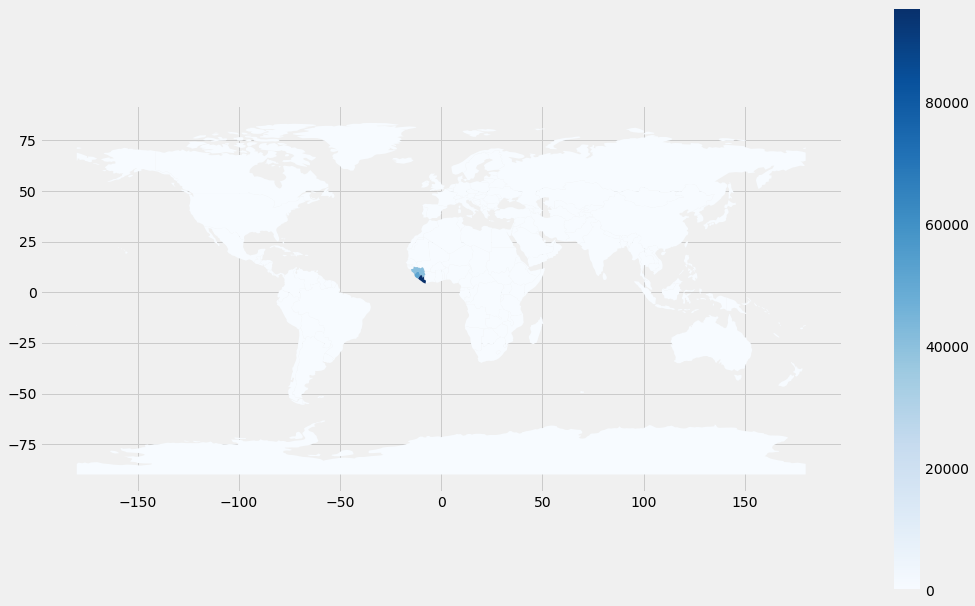

In [89]:
countries.plot(column='Deaths', figsize=(16, 10), cmap='Blues', legend=True)